**Fast Style Transfer**

In [7]:
import re
import urllib
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
from PIL import Image

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from IPython import display

**Downloading Images**

In [2]:
def download_image_from_URL(imageURL):
  imageName = re.search('[a-z0-9\-]+\.(jpe?g|png|gif|bmp|JPG)', imageURL, re.IGNORECASE)
  imageName = imageName.group(0)
  urllib.request.urlretrieve(imageURL, imageName)
  imagePath = "./" + imageName
  return imagePath

In [3]:
# This is the path to the image you want to transform.
target_url = "https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch12/ferns.jpg"
target_path = download_image_from_URL(target_url)

In [5]:
# This is the path to the style image.
style_url = "https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch12/on-the-road.jpg"
style_path = download_image_from_URL(style_url)

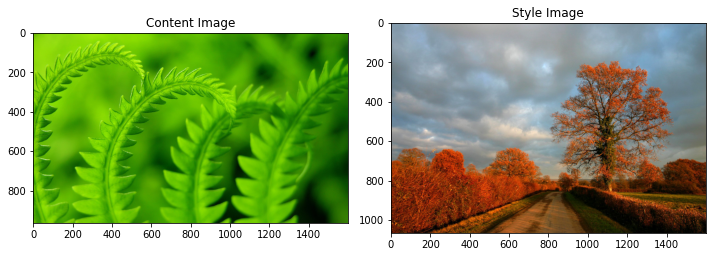

In [9]:
content = Image.open(target_path)
style = Image.open(style_path)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(content)
plt.title('Content Image')
plt.subplot(1, 2, 2)
plt.imshow(style)
plt.title('Style Image')
plt.tight_layout()
plt.show()

**Preparing Images for Model Input**

In [10]:
def image_to_tensor_style(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
  img = tf.image.resize(img, [256,256])
  img = img[tf.newaxis, :]
  return img

In [11]:
def image_to_tensor_target(path_to_img, image_size):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
  img = tf.image.resize(img, [image_size,image_size], preserve_aspect_ratio=True)
  img = img[tf.newaxis, :]
  return img

In [12]:
output_image_size = 400
target_image = image_to_tensor_target(target_path,output_image_size)
style_image = image_to_tensor_style(style_path)

**Performing Styling**

In [13]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [15]:
outputs = hub_module(tf.constant(target_image), tf.constant(style_image))

In [16]:
stylized_image = outputs[0]

**Displaying Output**

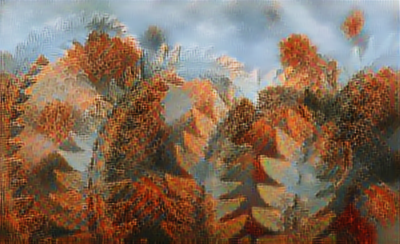

In [17]:
tensor = stylized_image*256
tensor = np.array(tensor, dtype=np.uint8)
tensor = tensor[0]
PIL.Image.fromarray(tensor)